In [3]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [18]:
df = sns.load_dataset('tips')

In [150]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df_sex = df.groupby('sex').agg({'total_bill':'mean', 'tip':'mean'}).reset_index()
fig = px.bar(df_sex, x= 'sex', y=['total_bill', 'tip'], barmode='group')
fig.update_layout(height=600, width=800)


In [ ]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data1 = [10,13, 14, 14, 18, 16, 15, 16, 17, 19, 19, 20]
data2 = [20,23, 23, 24, 21, 26, 25, 24, 29, 29, 26, 30]
data3 = [10,15, 16, 17, 19, 23, 25, 24, 27, 28, 29, 33]
fig = px.line(x=months, y=[data1, data2, data3])

fig.update_layout(height=600,width=900)
fig.update_traces(line = dict(width=4))
newnames={'wide_variable_0':'Tablets', 'wide_variable_1':'Computers', 'wide_variable_2':'Phones'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]))


fig.show()

# Annotations

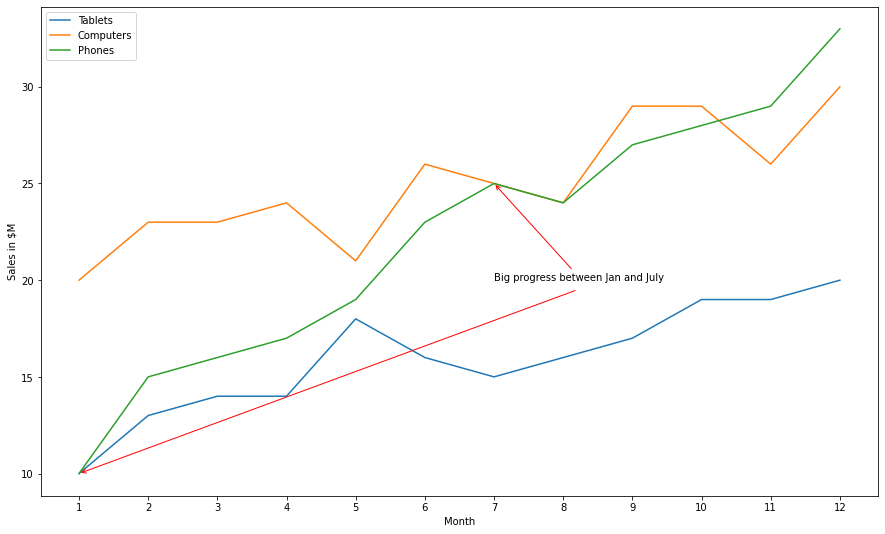

In [ ]:
# Setup figure size
plt.figure(figsize=(15,9))

# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data1 = [10,13, 14, 14, 18, 16, 15, 16, 17, 19, 19, 20]
data2 = [20,23, 23, 24, 21, 26, 25, 24, 29, 29, 26, 30]
data3 = [10,15, 16, 17, 19, 23, 25, 24, 27, 28, 29, 33]

# Plot line 1
sns.lineplot(x=months, y=data1)
# Plot line 2
sns.lineplot(x=months, y=data2)
# Plot line 3
sns.lineplot(x=months, y=data3)
# Setup ticks and labels
plt.xticks(range(1,13))
plt.ylabel('Sales in $M')
plt.xlabel('Month')
# Setup legend
plt.legend(['Tablets', 'Computers', 'Phones'])
# Add annotation with an arrow
# Annotation with arrow (text, position of the arrow, position of the text, arrow configs)
plt.annotate( "Big progress between Jan and July", xy=(7, 25), xytext=(7, 20), arrowprops=dict(arrowstyle="->",color='red') )
plt.annotate( "", xy=(1, 10), xytext=(8.2, 19.5), arrowprops=dict(arrowstyle="->",color='red') )

plt.show()

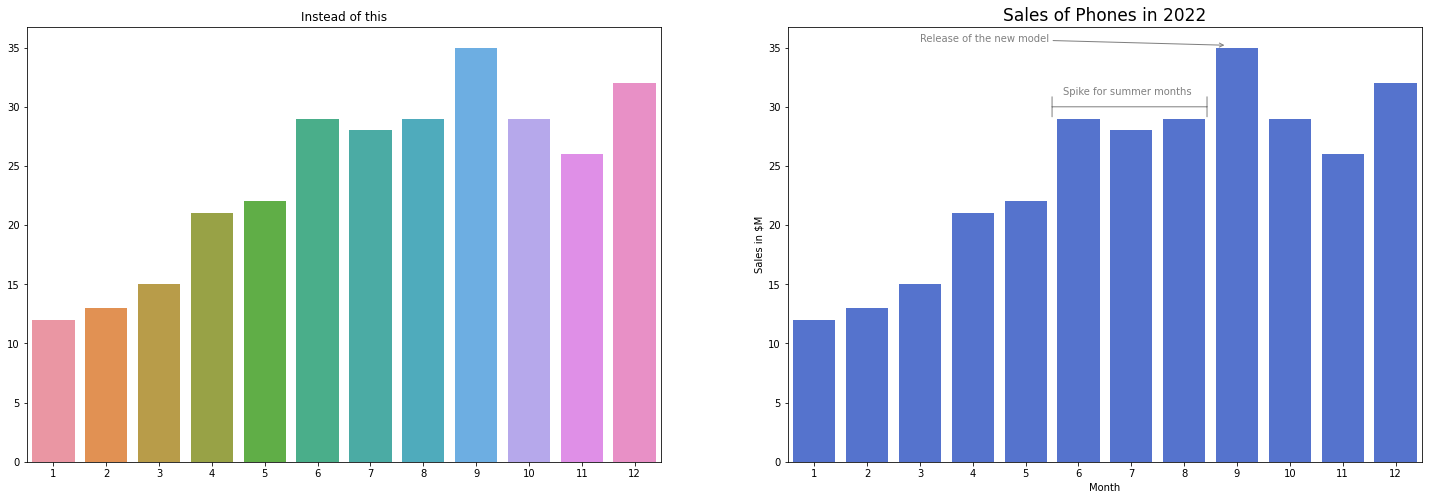

In [148]:
# Setup figure size
fig, ax = plt.subplots(1, 2, figsize=(25,8))

# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data1 = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]
data2 = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]


# Plot line 1
g1 = sns.barplot(x=months, y=data1, ax=ax[0])
g1.set_title('Instead of this')
# Plot line 2
g2 = sns.barplot(x=months, y=data2, ax=ax[1], color='royalblue')
g2.set_title('Sales of Phones in 2022', size=17)
g2.set(xlabel='Month', ylabel='Sales in $M')

# Add annotation with an arrow
# Annotation with arrow (text, position of the arrow, position of the text, arrow configs)
plt.annotate( " ", xy=(4.5, 30), 
            horizontalalignment='center', verticalalignment='center',
            xytext=(7.5,30),
            arrowprops=dict(arrowstyle='|-|', shrinkA=0, shrinkB=0, color='gray', connectionstyle="arc3") )
plt.text(x=4.7, y=31, s='Spike for summer months', color='gray')
plt.annotate( "Release of the new model", xy=(7.8, 35.2), xytext=(2, 35.5), arrowprops=dict(arrowstyle="->",color='gray'), color='gray' )

plt.show()

## Aesthetics

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create the Subplots area with 2 rows and 2 columns (4 plots)
fig = make_subplots(rows=1, cols=2,
                    #Graph Types
                    specs=[ [{'type': 'xy'}, {'type': 'xy'}] ],
                    # Titles for each graphic
                    subplot_titles=("X vs Y", "| Y by X"))


# Title for the Dashboard
fig.update_layout(height=600, width=1000)
fig.update_layout(showlegend=False)


# Plot 1 | Clients by Gender
#df_sex = df.groupby('sex').total_bill.count().reset_index()
fig.add_trace(go.Scatter(x=df.total_bill, y=df.tip, mode='markers', marker=dict(size=10, opacity=.5)),
              row=1, col=1)

# Plot 2 | Median spending by Party Size
median_tip = df.groupby('sex').tip.median().reset_index()
fig.add_trace(go.Bar(x= median_tip['sex'], y=median_tip.tip, name='(Size, MEDIAN)'),
              row=1, col=2)


## Scale

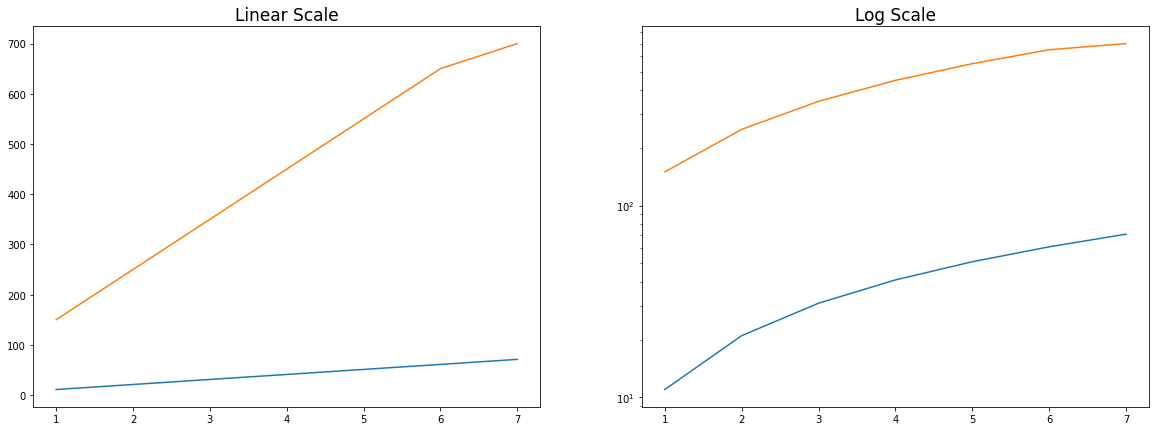

In [26]:
# Setup figure size
fig, ax = plt.subplots(1, 2, figsize=(20,7))

# Data
months = [1, 2, 3, 4, 5, 6, 7]
data1 = [11,21,31,41,51,61,71]
data2 = [150, 250, 350, 450, 550, 650, 700]


# Plot line 1
g1 = sns.lineplot(x=months, y=data1, ax=ax[0])
g1 = sns.lineplot(x=months, y=data2, ax=ax[0])
g1.set_title('Linear Scale', size=17)
# Plot line 2
g2 = sns.lineplot(x=months, y=data1, ax=ax[1])
g2 = sns.lineplot(x=months, y=data2, ax=ax[1])
g2.set_yscale('log')
g2.set_title('Log Scale', size=17)



plt.show()

## Geometry

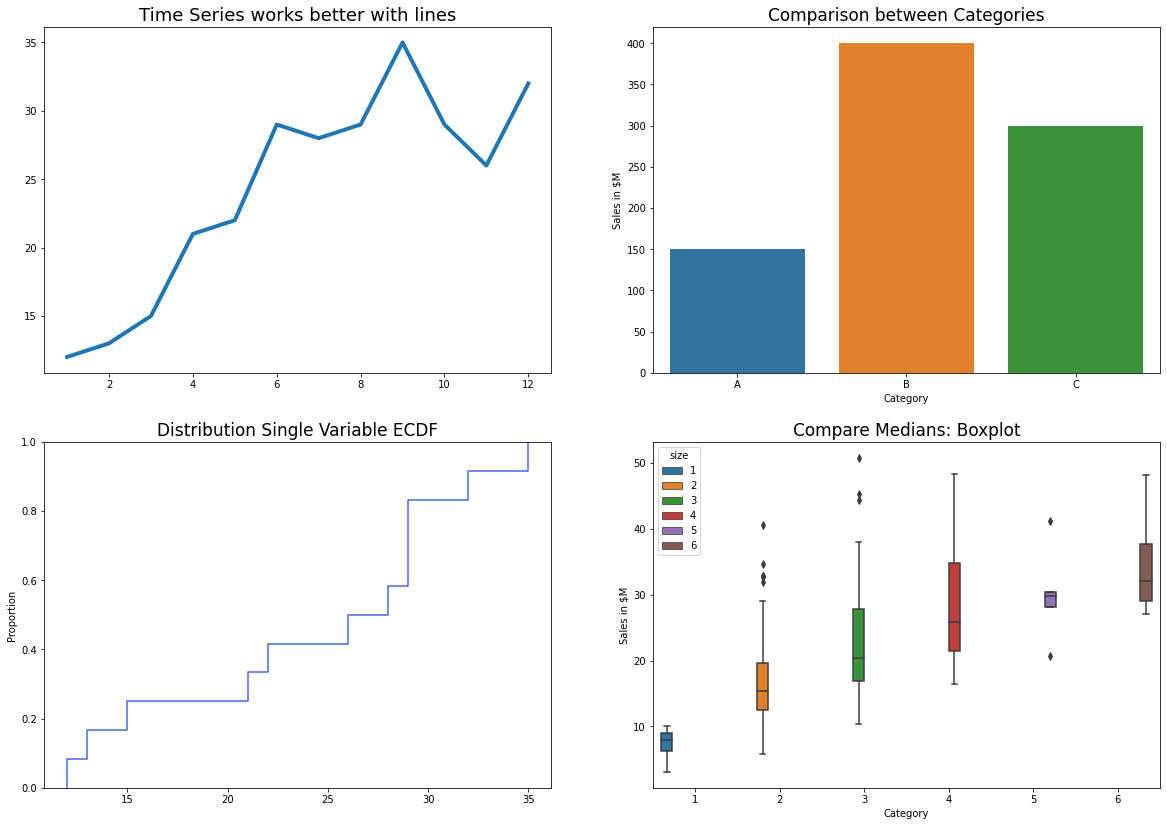

In [28]:
# Setup figure size
fig, ax = plt.subplots(2, 2, figsize=(20,14))

# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data1 = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]
data2 = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]


# Plot 1
g1 = sns.lineplot(x=months, y=data1, ax=ax[0][0], lw=4)
g1.set_title('Time Series works better with lines', size=18)

# Plot 2
g2 = sns.barplot(x=['A', 'B', 'C'], y=[150, 400, 300], ax=ax[0][1])
g2.set_title('Comparison between Categories', size=17)
g2.set(xlabel='Category', ylabel='Sales in $M')

# Plot 3
g2 = sns.ecdfplot(x=data2, ax=ax[1][0], color='royalblue')
g2.set_title('Distribution Single Variable ECDF', size=17)

# Plot 4
g3 = sns.boxplot(data=df, x='size', y='total_bill', hue='size', ax=ax[1][1])
g3.set_title('Compare Medians: Boxplot', size=17)
g3.set(xlabel='Category', ylabel='Sales in $M')

plt.show()

## Statistics

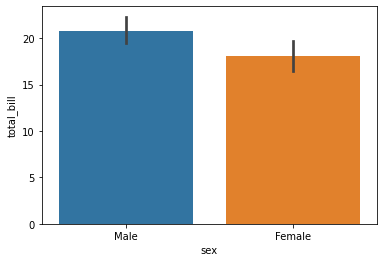

In [23]:
sns.barplot(data=df, x='sex', y='total_bill');

In [34]:
# Scatter Polar
fig = px.scatter_polar(df, r="tip", theta="smoker", size='tip')
fig.update_layout(height=600, width=600)
fig.show()

## Annotations

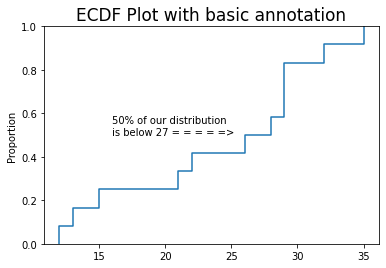

In [55]:
# Plot
data = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]
g = sns.ecdfplot(x=data)
g.set_title('ECDF Plot with basic annotation', size=17)

# Basic annotation
plt.annotate("50% of our distribution \nis below 27 = = = = =>", xy=(16, 0.5));

## Box around Text

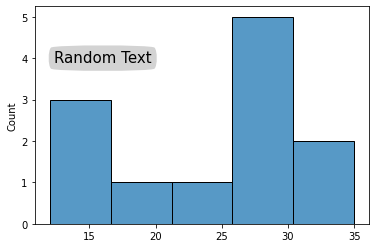

In [71]:
# Plot
data = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]
g = sns.histplot(x=data)

# Basic annotation
#plt.text(x=15, y=4, s='Random text', color='green')
plt.text(16, 4, "Random Text", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round4, pad=0.4", fc="lightgray", ec="r", lw=0));

## Arrows

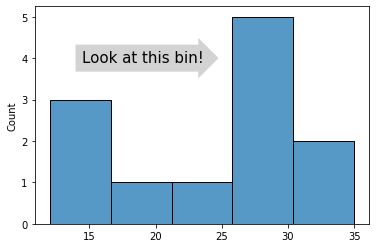

In [77]:
# Plot
data = [12,13, 15, 21, 22, 29, 28, 29, 35, 29, 26, 32]
g = sns.histplot(x=data)

# Arrow with comments inside
plt.text(19, 4, "Look at this bin!", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="rarrow, pad=0.4", fc="lightgray", ec="r", lw=0));

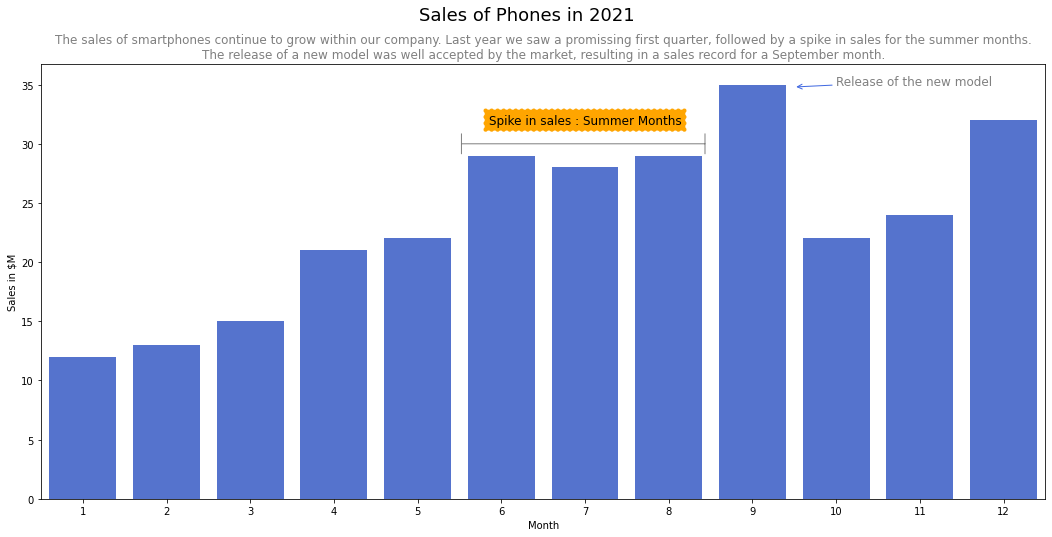

In [128]:
# Setup figure size
plt.figure(figsize=(18,8))

# Data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
data1 = [12,13, 15, 21, 22, 29, 28, 29, 35, 22, 24, 32]

# Plot
g = sns.barplot(x=months, y=data1, color='royalblue')
#Title
plt.suptitle('Sales of Phones in 2021', size=18)
g.set_title('''The sales of smartphones continue to grow within our company. Last year we saw a promissing first quarter, followed by a spike in sales for the summer months.
The release of a new model was well accepted by the market, resulting in a sales record for a September month.''', color='gray')
g.set(xlabel='Month', ylabel='Sales in $M' )

# Add annotation for the arrow type |--|
plt.annotate( " ", xy=(4.5, 30), 
            horizontalalignment='center', verticalalignment='center',
            xytext=(7.5,30),
            arrowprops=dict(arrowstyle='|-|', color='gray') )

# Text and Arrow pointing to the top bar in September
plt.annotate( "Release of the new model", xy=(8.5, 34.8), xytext=(9, 35), arrowprops=dict(arrowstyle="->",color='royalblue'), color='gray', size=12 )

# Text "Spike for Summer Months"
plt.text(6, 32, "Spike in sales : Summer Months", ha="center", va="center", rotation=0, size=12, bbox=dict(boxstyle="roundtooth, pad=0.5", fc="orange", ec="r", lw=0));

plt.show()